# Explatory data analysis 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df= pd.read_excel("dataset.xlsx")
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)


In [7]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### 2.1  shape and dtype 

In [8]:
df.shape
#df.columns

(5644, 111)

In [9]:
df.dtypes.value_counts()
#plt.show()

float64    70
object     37
int64       4
dtype: int64

#### 2.2 missing values identification
In my opinion, the best way to identify missing values is by visualizing the entire dataset. However, someone might ask how we can display such a massive dataset with a shape of (5644, 111). The answer to this question is that we can represent it as an image. It's important to remember that, for example, a black-and-white image can have a large number of pixels with zeros and ones. We can apply a similar approach by treating each value as a pixel, which can be "True" (not missing) or "False" (missing). Therefore, we can visualize the entire dataset as an image.


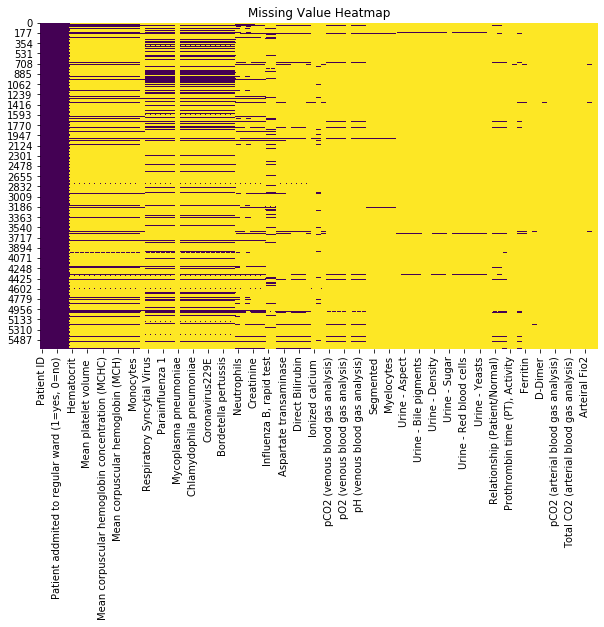

In [10]:
import seaborn as sns

# first cerate your pixles  based on a condition  ( missing value  or not ) : #df.isnull()
#then give this output to heatmap to give you the image 
# of course you can chose  2 diffrent clolurs to difrentiate between your two pixles types

# Create a heatmap of missing values
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') 
# Add a title
plt.title('Missing Value Heatmap')
plt.show()

### insights  :
1. We can observe from this image that the yellow color is dominant, which indicates that we have a high number of missing values. The purple color corresponds to non-missing values.
2. The region on the right side is extremely empty, so it's certain that we will need to remove it.



##### It's also usefule to find the percentage of missing values in each column 

In [11]:
df.isnull().mean().sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

##### notes : 
what we do with colunms that have 90% of misisng values!! ??? .  of course nothing 
It's worth noting that any column with more than 90% missing data will be removed as part of our data cleaning process.

#### 1. droping  unnecessary columns

In [12]:
##1.1 droping columns with too much missing values

In [13]:
 
## cerate a boleean dataframe  based on threshould 
bolleen_df = df.isnull().mean()<0.9
#bolleen_df
    
# input this boolean daframe to the dastet to chose your columnes
chosen_columns  = df.columns[bolleen_df]
# display df with this columns 

df= df[chosen_columns]
df


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### observations :
 "As you can see, we now have 39 columns instead of the original 111."

In [14]:
##1.2 dropiing columns that your knwo they have no imapct :patient id 

In [15]:

df = df.drop('Patient ID', axis=1)

In [16]:
## THEN THIS YOUR DATSET 

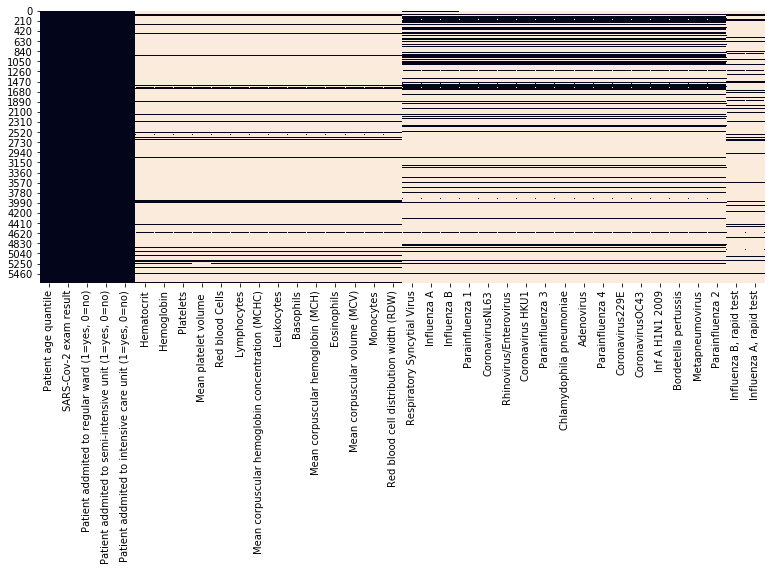

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
sns.heatmap(df.isnull() , cbar= False)
plt.show()


##   Content Analyse 

##### 1. plotting the target  variable 

In [18]:
values_count= df["SARS-Cov-2 exam result"].value_counts()
values_count
values_count.values

array([5086,  558], dtype=int64)

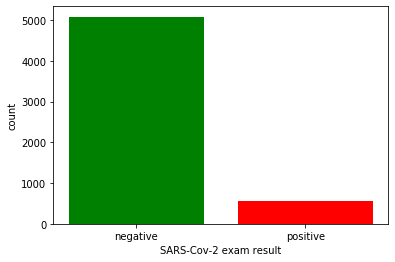

In [19]:

values_count= df["SARS-Cov-2 exam result"].value_counts()
plt.bar(values_count.index , values_count.values ,  color=['green', 'red'])
plt.xlabel("SARS-Cov-2 exam result")
plt.ylabel("count")
plt.show()

#### notes  :
We can confirm that our dataset is unbalanced. Therefore, it is necessary to consider other metrics such as the F1 score, sensitivity, or precision.

### 2 features understanding 

In [20]:
## 2. 1 Continues features 

In [21]:
continuous_features = df.select_dtypes('float')



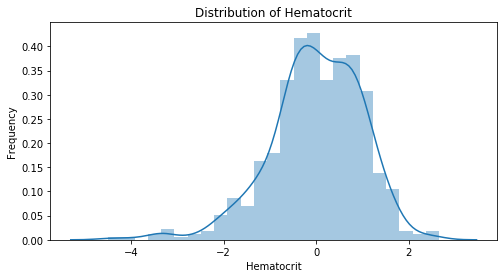

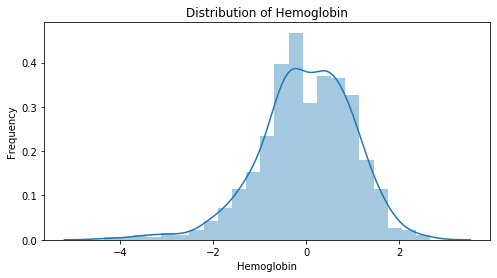

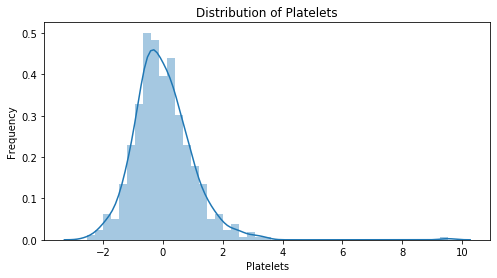

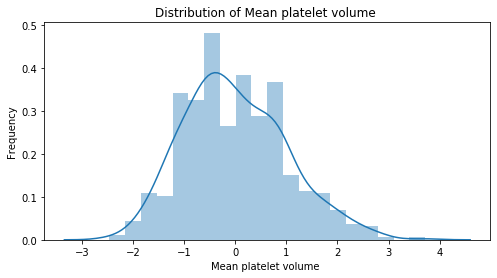

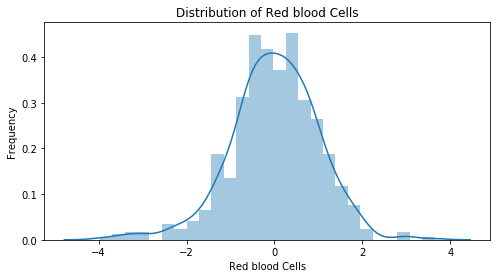

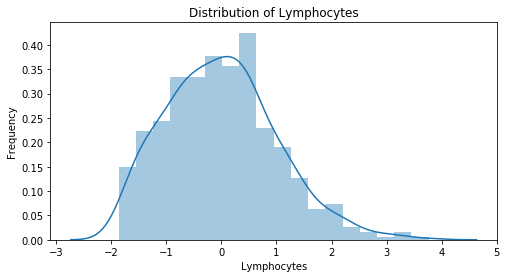

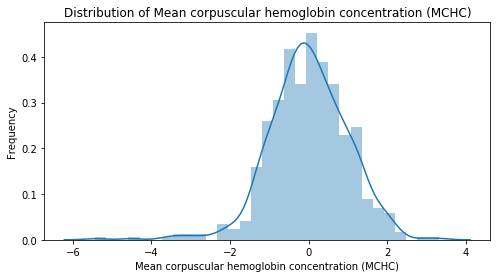

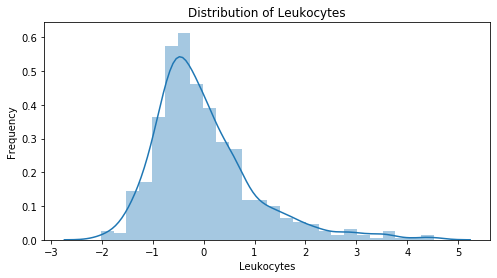

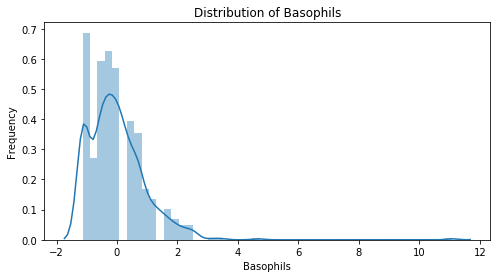

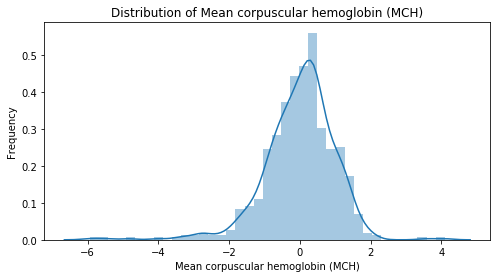

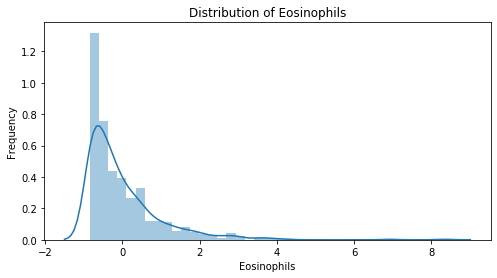

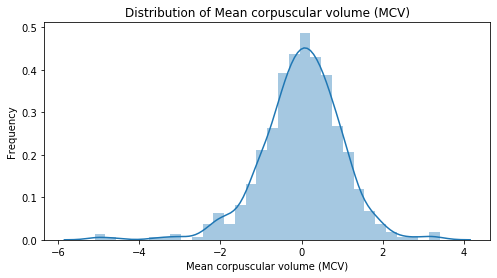

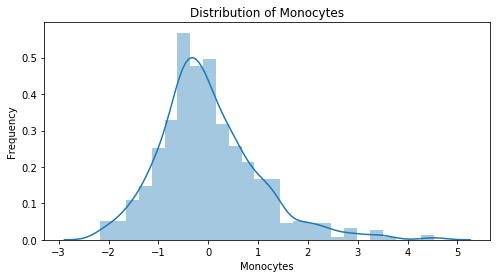

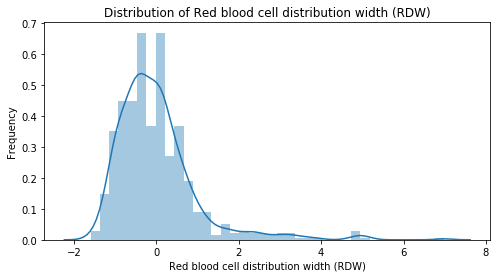

In [22]:
for col in continuous_features :
    plt.figure(figsize=(8, 4))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### insights:
1. We can discern that all the distributions are centered around zero and tend to exhibit a standard deviation close to 1, suggesting that these values are already standardized.
2. Some distributions are skewed, as seen in the case of Eosinophils.
3. Hematocrit and Hemoglobin share nearly identical distributions.


In [23]:
## 2.2 displyin int variables 

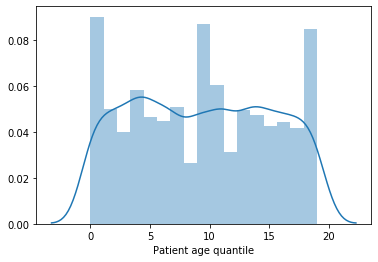

In [24]:
sns.distplot(df['Patient age quantile'])

#### Observations :
we could assume that these values represent age categories: 0 for the age range between 0 and 5, 1 for ages between 5 and 10, and so on. It's possible that the variables were already transformed in this manner but the dataset doesn't offer any explicit explanations for these observations.


#### 2.3  Categorical features 
It's a good idea to begin by displaying each categorical feature along with its different categories.


In [25]:
categorical_features = df.select_dtypes('object')

In [26]:
for col in categorical_features :
    print(f'{col :-<50}  {df[col].unique()}')

SARS-Cov-2 exam result----------------------------  ['negative' 'positive']
Respiratory Syncytial Virus-----------------------  [nan 'not_detected' 'detected']
Influenza A---------------------------------------  [nan 'not_detected' 'detected']
Influenza B---------------------------------------  [nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------  [nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------  [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------  [nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------  [nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------  [nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------  [nan 'not_detected' 'detected']
Adenovirus----------------------------------------  [nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------  [nan 'not_detected' 'detected']


### insights : 
1. We can readily observe that all our variables are binary. 
2. Additionally, it's apparent that Parainfluenza 2 is a unary variable, rendering it redundant or unnecessary for our analysis."

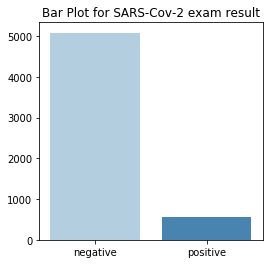

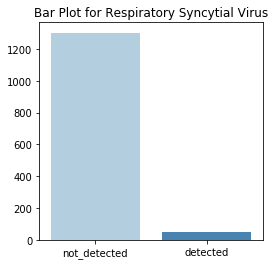

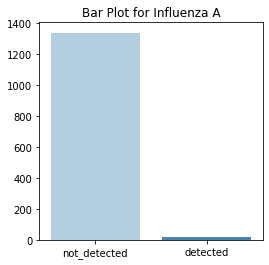

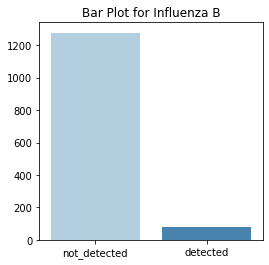

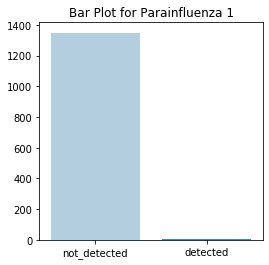

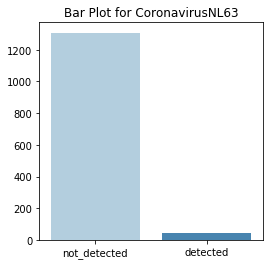

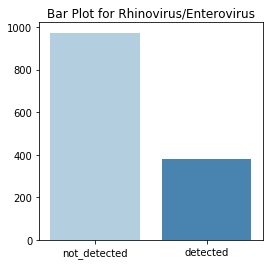

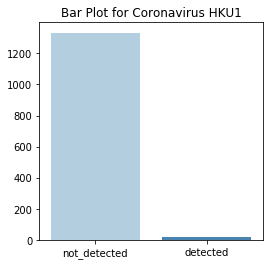

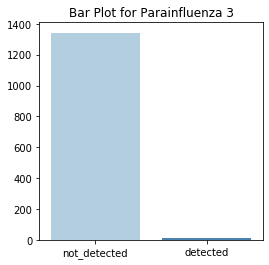

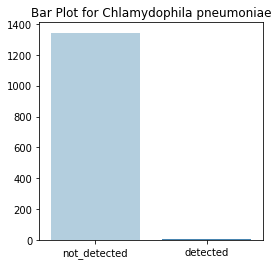

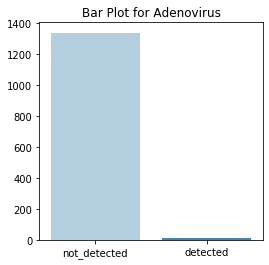

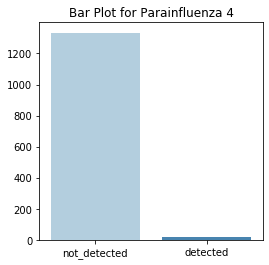

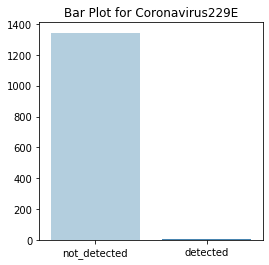

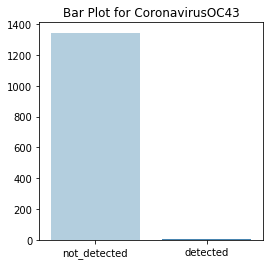

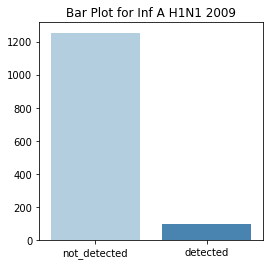

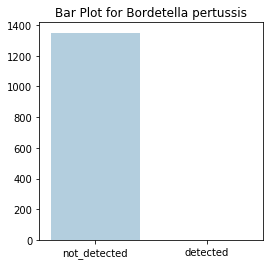

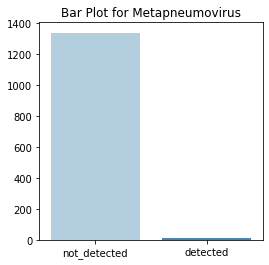

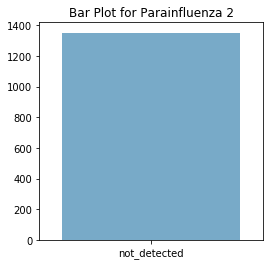

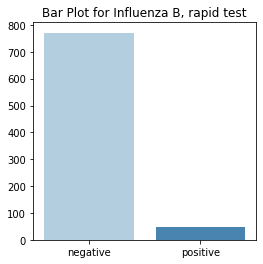

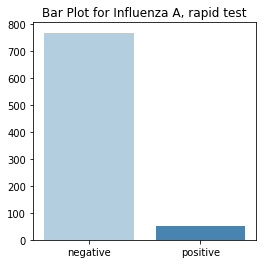

In [27]:
for col in categorical_features :
    
    values_count= df[col].value_counts()
    
    plt.figure(figsize=(4, 4))
    sns.barplot(values_count.index, values_count.values, palette="Blues")
    # ADD SOME ESTHETIC 
    # Adding labels and title
    
    plt.title(f'Bar Plot for { col}')
        


    

### insights : 
In terms of frequency for these categories, it's evident that the majority of test features predominantly show negative results, with the exception of the Rhinovirus/Enterovirus test feature, which notably exhibitS a significant proportion of positive test results.


# 3.  features  vs target variable  relaions

#### 3.1 build  postive datset and negative  dateset

To simplify your analysis, it's advisable to examine each category in your target variable individually. This way, you can analyze negative samples and positive samples separately.

In [28]:
df_positive = df[df['SARS-Cov-2 exam result']== 'positive']
df_negative = df[df['SARS-Cov-2 exam result']== 'negative']

#### 3.2 Build Blood columns and  viral columns 

its alsso a godd idea if it is applicable to anylse a cagetogy of columns : for example here we can see clearly that we have blood  tests and viral thests. you can search in intenrt or spot some simialarties as filetr .
in this dataset we already spoted in THE firs step that the two catgoris of test have similar rate of missing_values

In [29]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

#### 3.3 display the distribitons of the same feature  in the two target categorsies and compare 
This is where things start to get interesting.We will go ahead and compare the distribution of each variable to see if we notice any significant differences." 

####   Blood category  vs Target 


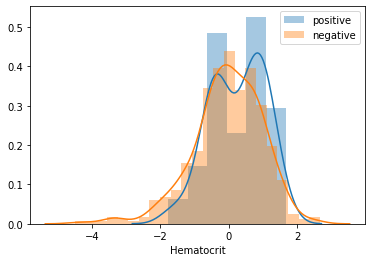

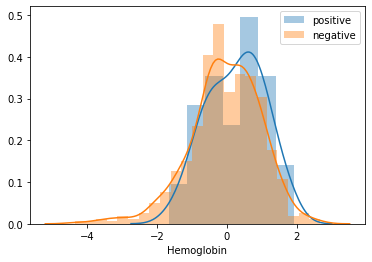

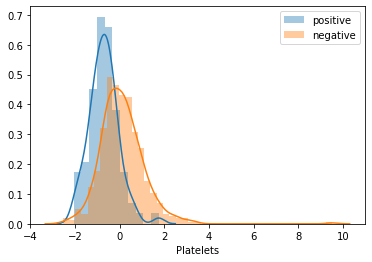

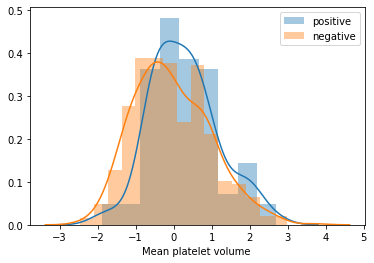

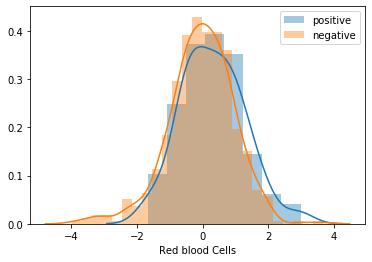

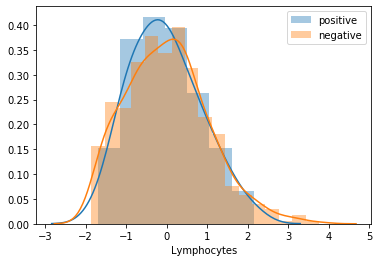

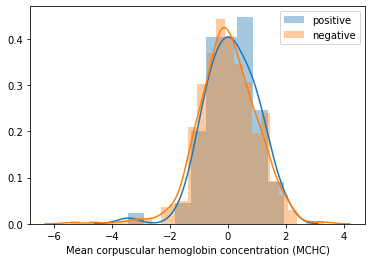

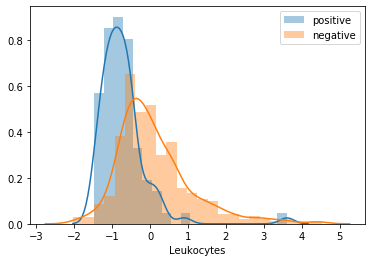

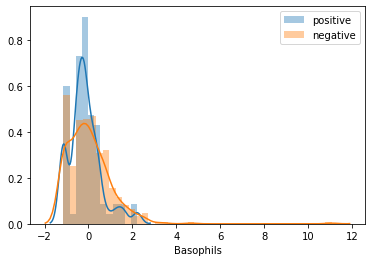

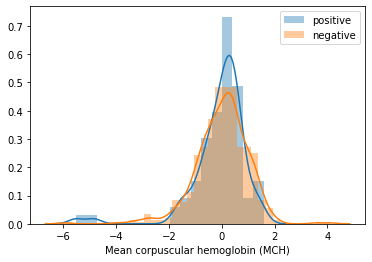

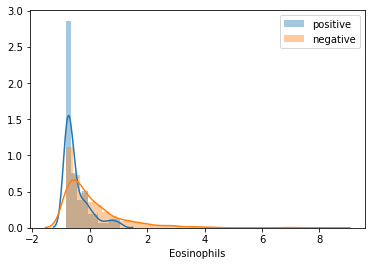

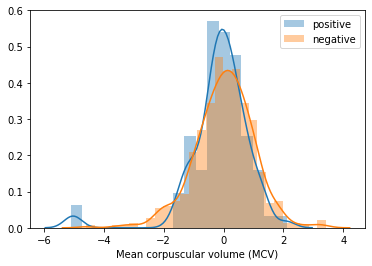

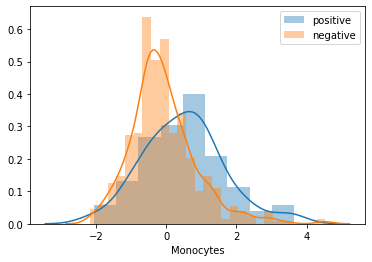

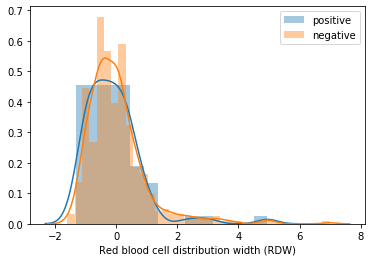

In [30]:
for col in blood_columns :
    plt.figure()
    sns.distplot(df_positive[col] , label= 'positive')
    sns.distplot(df_negative[col] , label= 'negative')
    plt.legend()

## insights :
After comparing the distributions one by one, we can observe that most of them are quite similar. However, it's worth noting that the three target distributions of the features, Monocytes, Platelets, and Leukocytes, exhibit some differences. This suggests a potential connection between these features and COVID-19. This observation can be further developed into a hypothesis to be tested."

####     Age feature vs target 

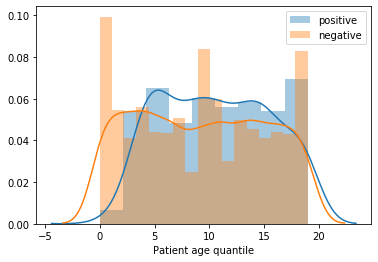

In [31]:

plt.figure()
sns.distplot( df_positive['Patient age quantile'] ,label= "positive")
sns.distplot(df_negative['Patient age quantile'], label= 'negative')
plt.legend()

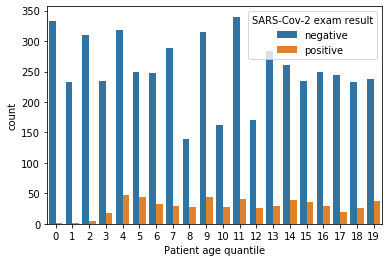

In [32]:
# secode aprroche  with plotcount  :
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

### Insights
The notable observation we can make from here is the potential relationship between age and COVID-19 infection. It appears that individuals in the lower age quantiles have a lower infection rate. However, it's essential to be carefule with this assumption, as the exact interpretation of these quantiles remains uncertain. This doesn't necessarily warrant dropping the variable, as its significance may become apparent upon further investigation."

####  relation  viral ( categorical) vs target  :
   1. cross-tabulation (contingency tables)
   2. chi-squared tests
   3. visualizations

In [33]:
pd.crosstab(df['SARS-Cov-2 exam result'] ,df['Influenza A'] )

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


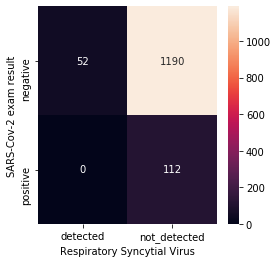

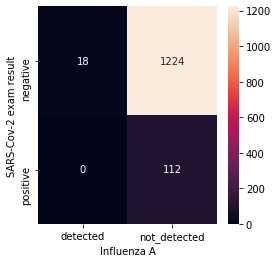

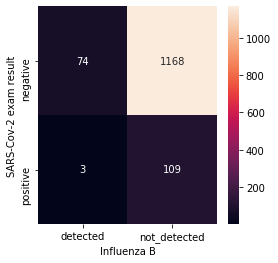

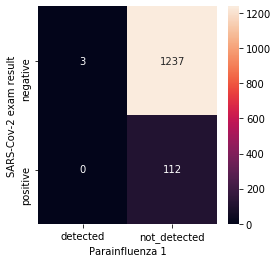

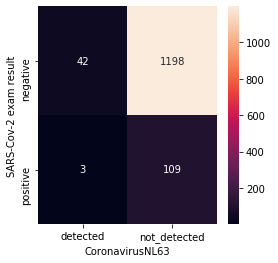

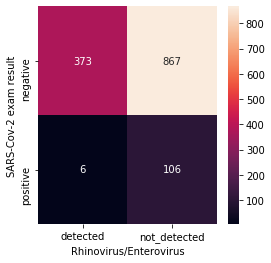

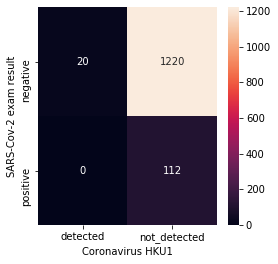

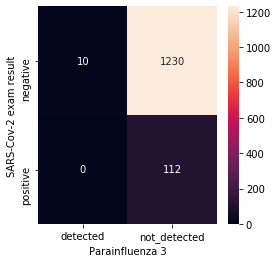

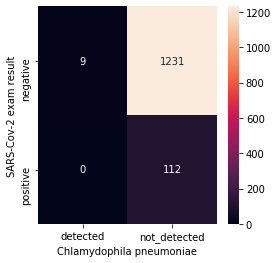

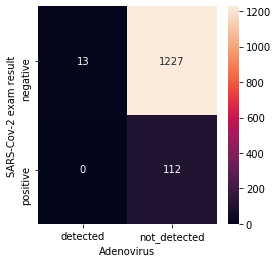

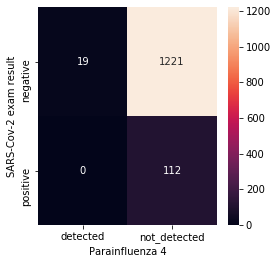

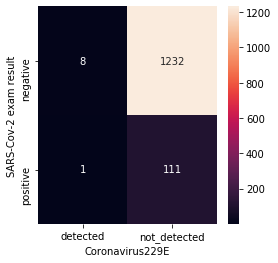

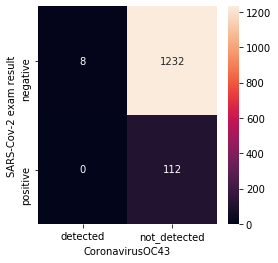

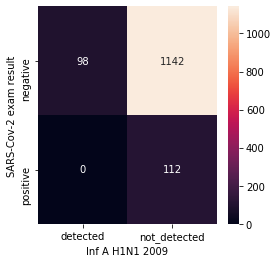

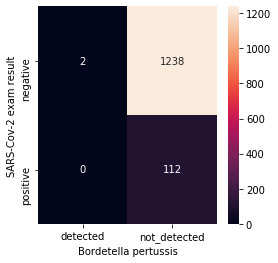

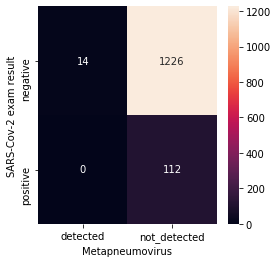

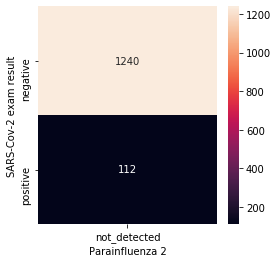

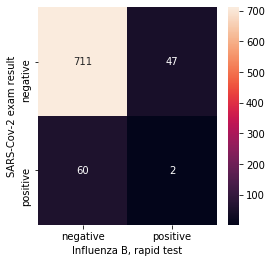

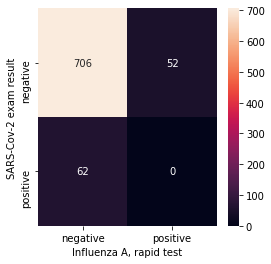

In [34]:
for col in viral_columns:
    plt.figure(figsize=(4, 4))
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'] ,df[col]) , annot=True , fmt="d")

### Observation 1: Co-Occurrence of Multiple Viruses

In general, it appears to be rare (virtually zero in this dataset) for individuals to have two different viruses simultaneously. This suggests a low likelihood of concurrent infections.

### Observation 2: Majority of Negative Cases

The majority of individuals in this dataset are classified as negative cases. This indicates that, in this sample, most people did not test positive for COVID-19.

### Observation 3: Rhinovirus/Enterovirus and COVID-19

Another interesting finding is that a substantial proportion of individuals who are contaminated with Rhinovirus/Enterovirus do not test positive for COVID-19. This observation raises the possibility that the presence of Rhinovirus/Enterovirus may not be directly related to COVID-19. It could be due to factors such as the prevalence of Rhinovirus/Enterovirus in the region. Further investigation, possibly through regional testing, could clarify this relationship.


### Observation 4: Disease Co-Occurrence

It's important to note that finding individuals with two diseases (A and B) doesn't necessarily imply a causal relationship between the two diseases. In some cases, the co-occurrence of diseases may be coincidental and unrelated. Therefore, it's crucial to exercise caution when inferring a causal connection solely based on co-occurrence.

## conclusion
mybe we can see that we dont have enough features to be able to make realy the diffrence between contaminated and non contaminated persons but we dont have to cancle our project .  insteed we have to continue our Analysis and see what we need to understand more about our data.

# Analysis profond 

### Realation feature- feature

##### 1.1  Continues variables grope
the best thing you can use ith this categroy is the magic fucntion pariplot 

In [35]:
## sns.pairplot(df[blood_columns])

In [36]:
#there another btter methode to exploit his pairt plot graphis is by dosplaying them using heatmap based on correlation matice

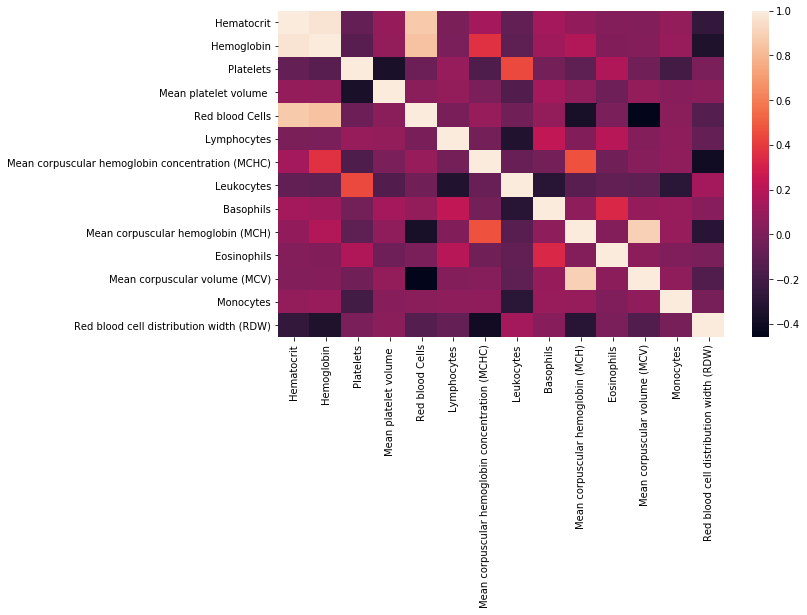

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[blood_columns].corr())
plt.show()

In [38]:
THIS PLOT IS SHOWIng US THE SAME THING WE HADE WITH PAIRPLOT WITH CORRLEATION 
EXPLAIN THE CORRELATION PRICIPLA : MORE THE VARIVLE ARE varying in the same direction more we are near to 1
# if you want to fidn gropes of vraibles that are probaply corleated you cna use cluster 

SyntaxError: invalid syntax (<ipython-input-38-aaeed8111c80>, line 1)

<Figure size 720x432 with 0 Axes>

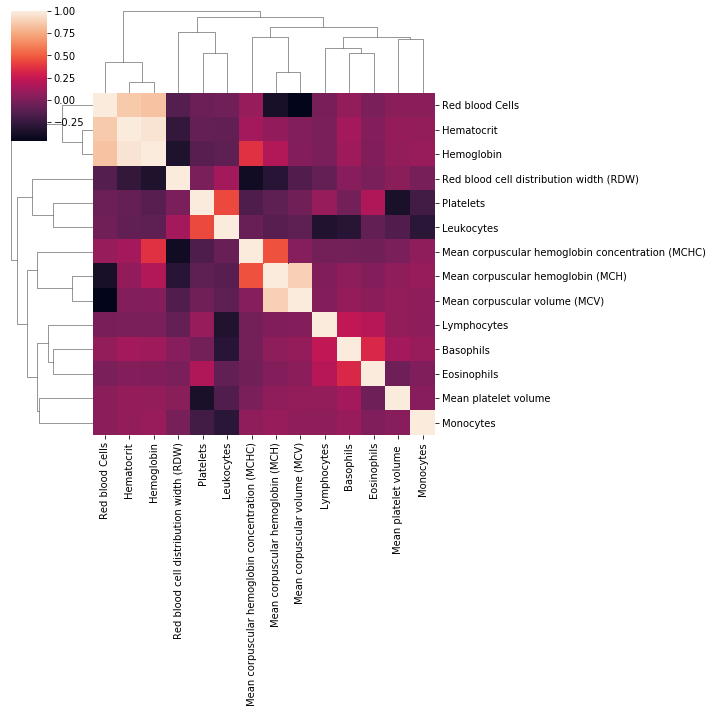

In [39]:
plt.figure(figsize=(10, 6))
sns.clustermap(df[blood_columns].corr())
plt.show()

# notes 
you need to understand here the cluster where they are
#thes are only ideas of suggets correlation but we dont know if realy are we need to test 

final note in this step we can say that certain vriables are importnalty corrlated ntil 0.9

#### 2. float vs some other int ( age)

In [41]:
#for col in blood_columns:
    #plt.figure()
    #sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [42]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

#### 3. Categorical  vs  categrical

###### Relation entre Influenza et rapid test
hre you can be smart and chose variables that you think are corrleatd .
for exmaple you can see that you ahve two tests for inflluneza  A and B  test rapdi and another test. so you can  dismplay
the coor matrice for the same test to sse how are related . more than that you can genrate some ideas . 

In [43]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

"Influenza A, rapid test",negative,positive
Influenza A,,
detected,2,4
not_detected,245,15


###  Viral / sanguin 
#### Création d'une nouvelle variable "est malade"

#### creating other features 
this depend on the task the domain :
we cna crete here : relation  : est  malde , relation hospitalisation , reation maladie 

In [44]:
df['sick'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

In [45]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",sick
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True


In [47]:
sick_df = df[df['sick'] == True]
no_sick_df = df[df['sick'] == False]

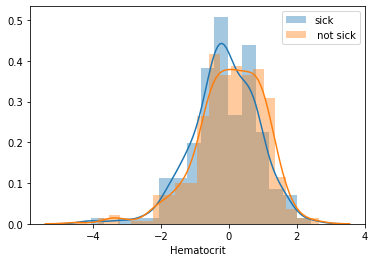

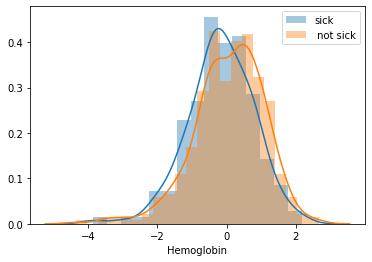

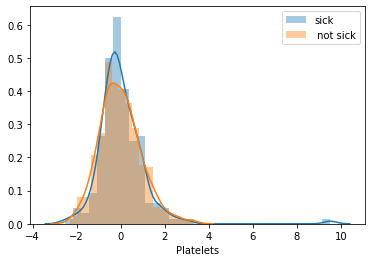

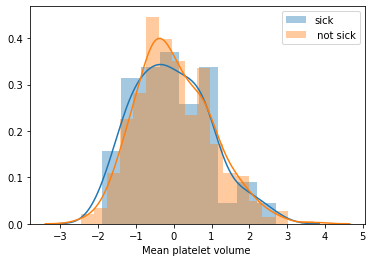

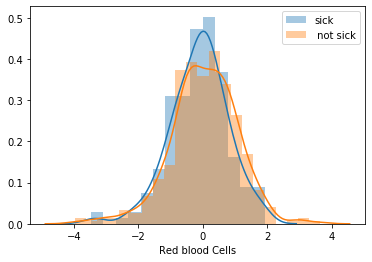

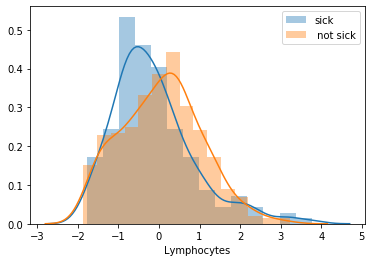

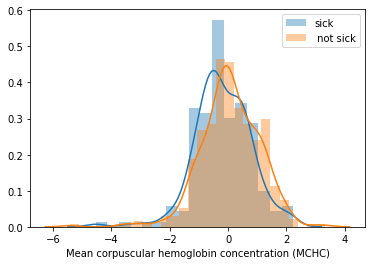

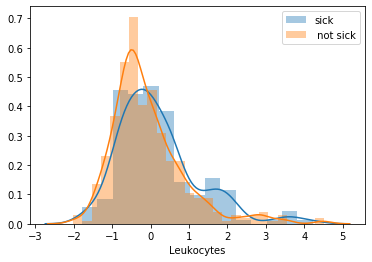

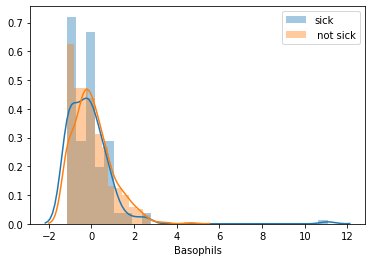

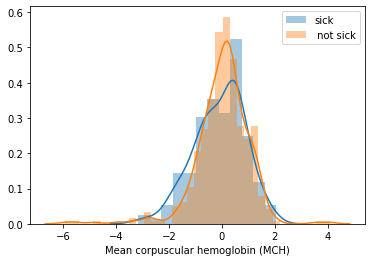

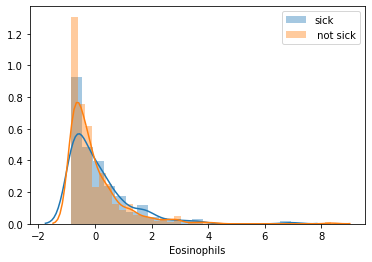

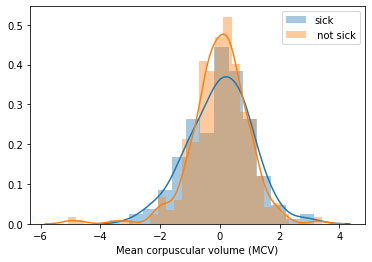

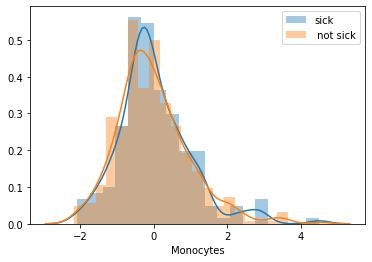

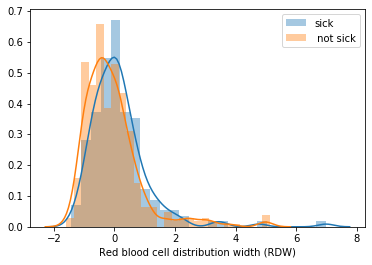

In [50]:
for col in blood_columns:
    plt.figure()
    sns.distplot(sick_df[col], label='sick')
    sns.distplot(no_sick_df[col], label=' not sick')
    plt.legend()

In [51]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [52]:
df['statut'] = df.apply(hospitalisation, axis=1)

In [53]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",sick,statut
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,inconnu
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True,inconnu
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,inconnu
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,inconnu
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True,inconnu


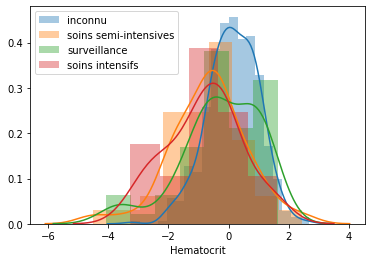

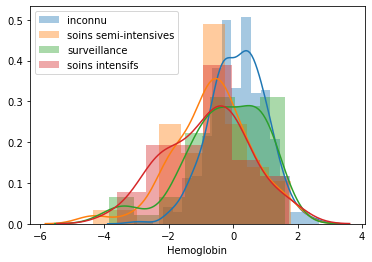

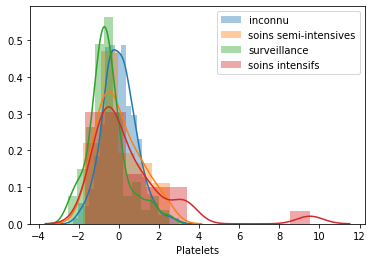

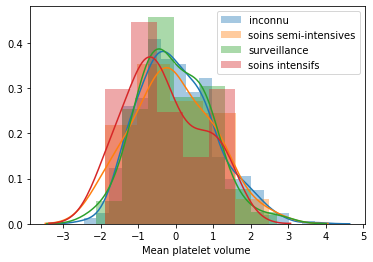

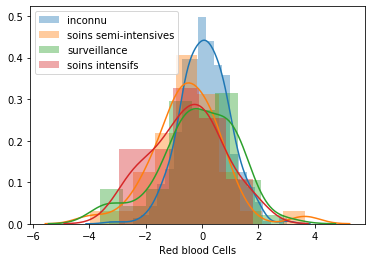

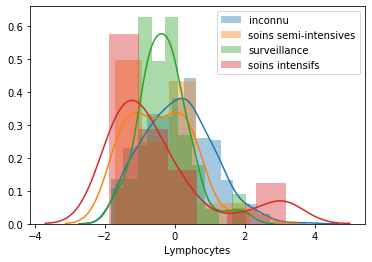

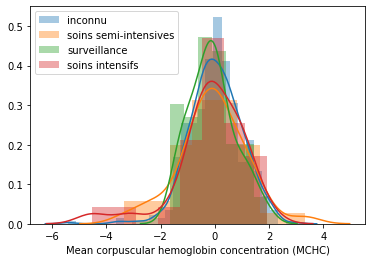

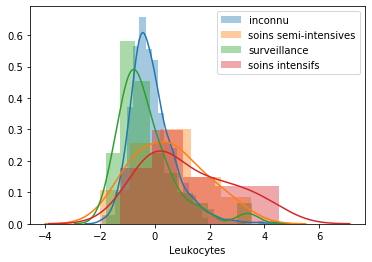

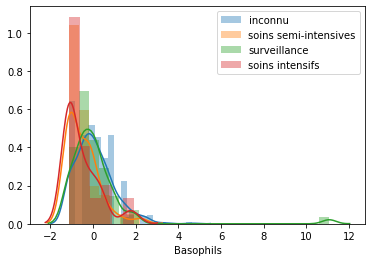

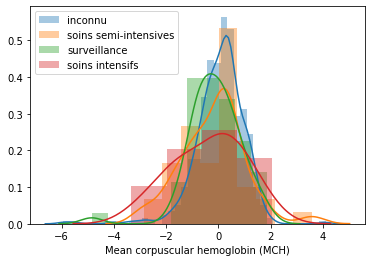

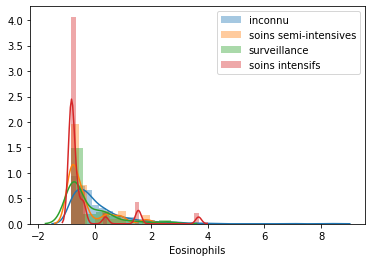

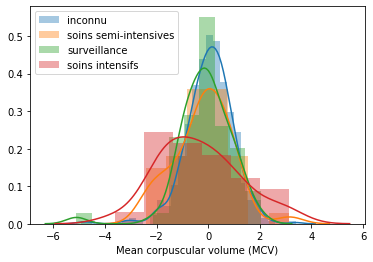

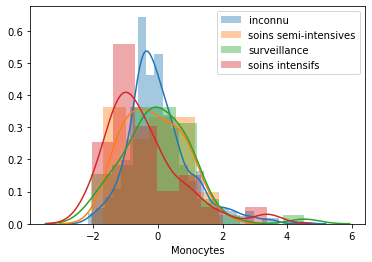

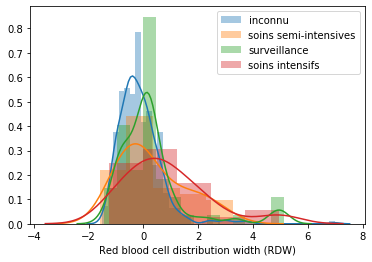

In [54]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

### Testing some Hypothesis

### T-Test

In [56]:
from scipy.stats import ttest_ind

In [58]:
df_positive

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
67,7,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,16,positive,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
513,10,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
568,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
676,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5633,4,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5634,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:

balanced_neg = df_negative.sample(df_positive.shape[0])

In [62]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), df_positive[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [63]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- H0 Rejetée
Red blood Cells----------------------------------- H0 Rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0
